In [41]:
! pip install yellowbrick  
! pip install gap-stat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
customer=pd.read_csv(r"/content/customer.csv")

In [3]:
customer.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<Axes: >

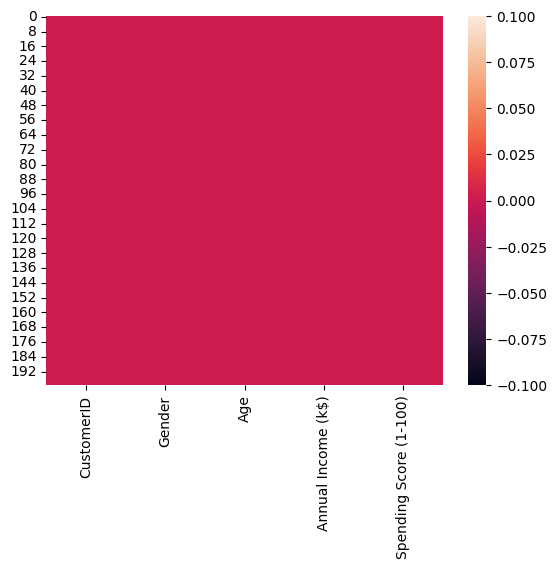

In [4]:
sns.heatmap(customer.isnull())

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


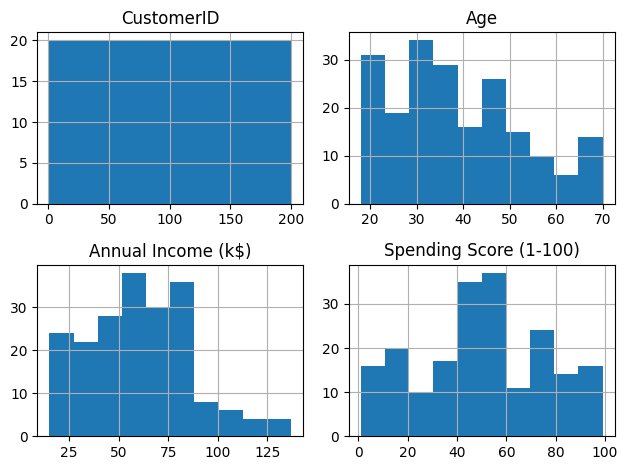

In [7]:
customer.hist()
plt.tight_layout()
plt.show()

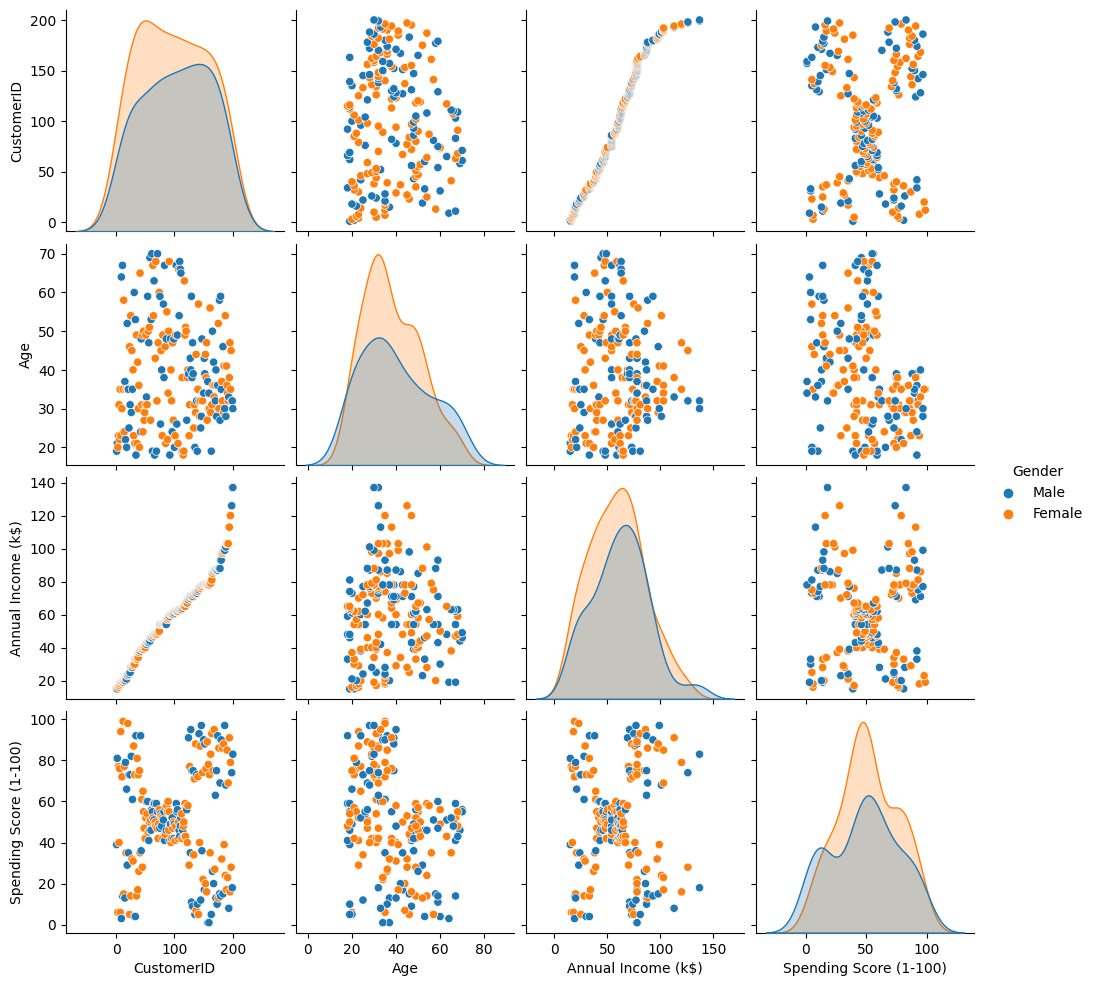

In [8]:
sns.pairplot(customer,hue='Gender')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

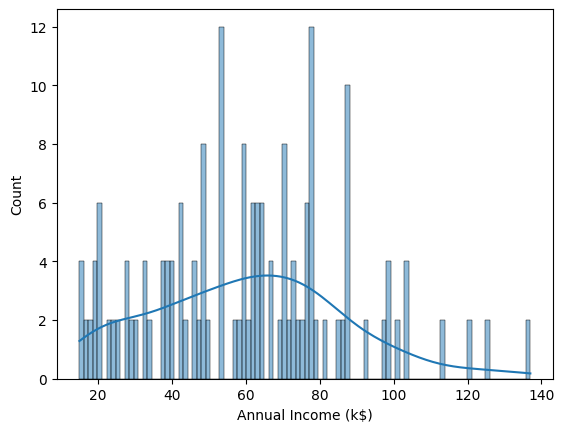

In [9]:
sns.histplot(customer['Annual Income (k$)'],kde=True,bins=100)

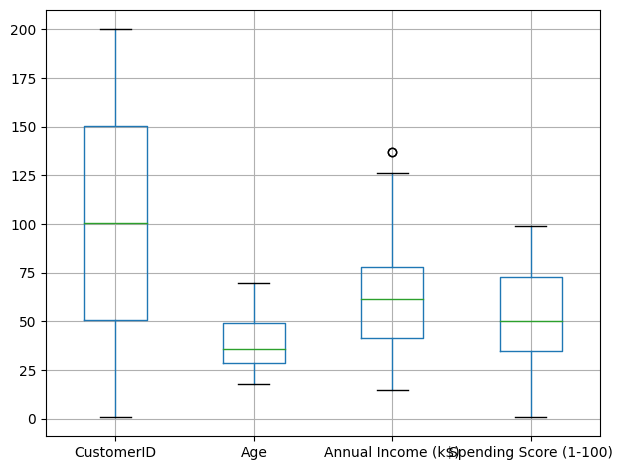

In [10]:
customer.boxplot()
plt.tight_layout()

In [11]:
def replace(x):
    if x == "Male":
        return 1
    else:
        return 0

In [12]:
customer["Gender"]=customer["Gender"].apply(replace)

In [13]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
X=customer[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
#v measure , sellohte ,

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from gap_statistic import OptimalK

# Evaluate with silhouette 

In [40]:
score=[]
for i in range(2,15):
    kmCluster=KMeans(n_clusters=i,n_init='auto',init='k-means++')
    kmCluster.fit(X)
    label=kmCluster.predict(X)
    score.append(silhouette_score(X,label))
print(max(score),(1+np.argmax(np.array(score))))

0.5194624832665107 1


# Evaluate with Elbow method

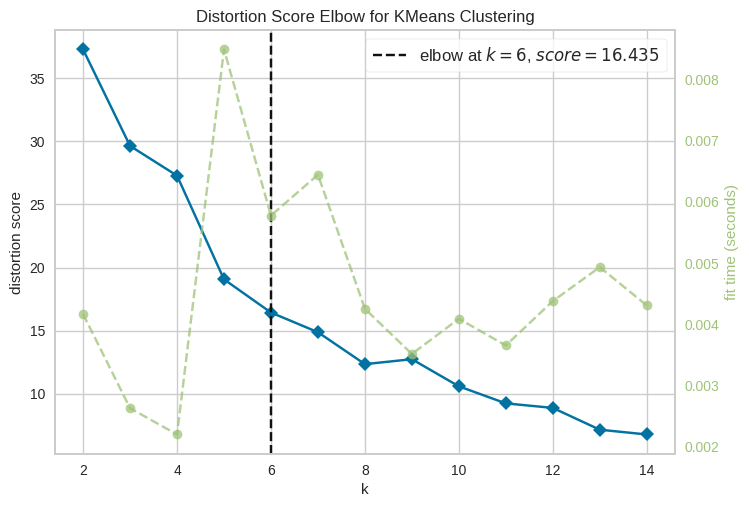

In [37]:
km = KMeans(n_init='auto',init='k-means++')
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(X)  
visualizer.show()
plt.show()

# Gap Statistics

In [49]:
def KMeans_clustering_func(X, k):
    """ 
    K Means Clustering function, which uses the K Means model from sklearn.
    
    These user-defined functions *must* take the X (input features) and a k 
    when initializing OptimalK
    """
    m = KMeans(random_state=11, n_clusters=k)
    m.fit(X)
    return m.cluster_centers_, m.predict(X)
optimalK = OptimalK(clusterer=KMeans_clustering_func)
n_clusters = optimalK(X, cluster_array=np.arange(1, 16))
print('Optimal clusters: ', n_clusters)
optimalK.gap_df[['n_clusters', 'gap_value']]

Optimal clusters:  15


,n_clusters,gap_value
0,1.0,-0.298329
1,2.0,0.314360
2,3.0,0.359040
3,4.0,0.498290
4,5.0,0.512547
5,6.0,0.522026
6,7.0,0.557929
7,8.0,0.629207
8,9.0,0.659175
9,10.0,0.769155


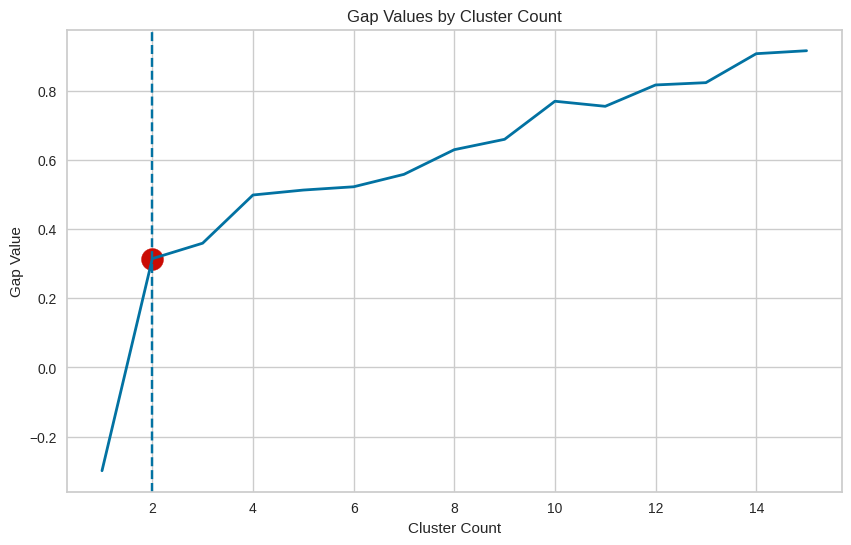

In [51]:
plt.figure(figsize=(10,6))
n_clusters=2
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=2)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.axvline(2, linestyle="--")
plt.show()

# calinski harabasz

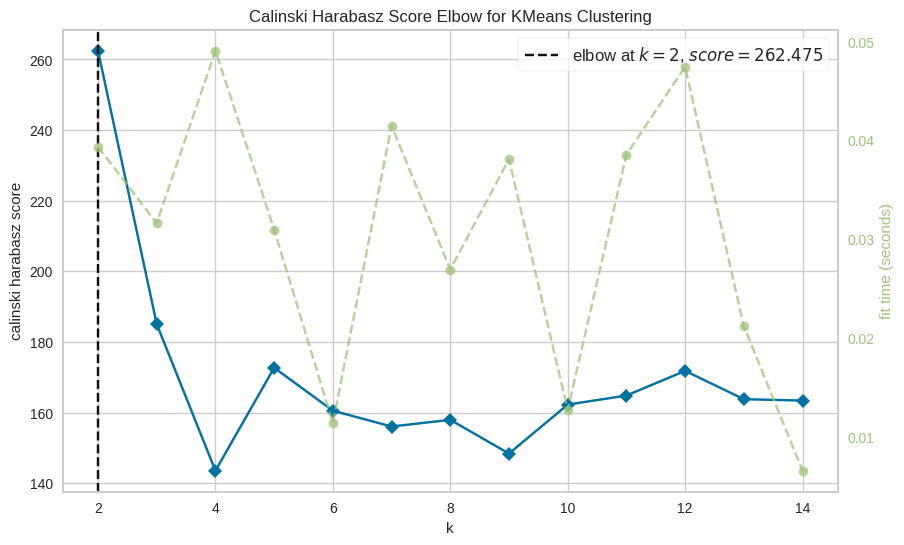

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [52]:
plt.figure(figsize=(10,6))
model = KMeans(n_init='auto',init='k-means++')
# k is a range of the number of clusters.
visualizer = KElbowVisualizer(
    model, k=(2, 15), metric="calinski_harabasz", timings=True
)
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.show()

#  davies bouldin score

In [54]:
from sklearn.metrics import davies_bouldin_score

In [55]:
score=[]
for i in range(2,15):
    kmCluster=KMeans(n_clusters=i,n_init='auto',init='k-means++')
    kmCluster.fit(X)
    label=kmCluster.predict(X)
    score.append(davies_bouldin_score(X,label))
print(min(score),(1+np.argmin(np.array(score))))

0.8172534497318453 1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
customerTree=DecisionTreeClassifier()

In [ ]:
customerTree.fit(customer[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']],customer[["Label"]])

DecisionTreeClassifier()

In [56]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
data=pca.fit_transform(customer[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

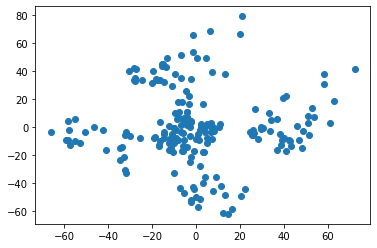

In [ ]:
plt.scatter(data[:,0],data[:,1])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dbscan=DBSCAN(eps=0.25)

In [ ]:
testcustomers=customer.copy(deep=True)

In [ ]:
testcustomers=MinMaxScaler().fit_transform(testcustomers[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

In [ ]:
dbscan=dbscan.fit(testcustomers)

In [ ]:
customer.Label.value_counts()

 1    111
 0     79
-1     10
Name: Label, dtype: int64

In [ ]:
testcustomers=customer.copy(deep=True)

In [ ]:
from scipy.spatial.distance import pdist
#diffrent matrix distance like cosine correlation euclidean cityblock and etc

In [ ]:
dict_pdist={}
list_metirc=['cosine','correlation', 'euclidean', 'cityblock']

In [ ]:
for i in list_metirc:
    dict_pdist[i]=pdist(
    X=testcustomers[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']],
    metric=i
)

In [ ]:
len(dict_pdist["cosine"])

19900

In [ ]:
testcustomers[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].shape

(200, 4)

In [ ]:
#shape as matrix
from scipy.spatial.distance import squareform

In [ ]:
squareform(dict_pdist["correlation"])

array([[0.00000000e+00, 3.78843785e-02, 8.21214767e-01, ...,
        5.78763800e-01, 1.03878848e+00, 5.68508893e-01],
       [3.78843785e-02, 0.00000000e+00, 1.09589683e+00, ...,
        7.06902064e-01, 1.20917222e+00, 6.85024715e-01],
       [8.21214767e-01, 1.09589683e+00, 0.00000000e+00, ...,
        5.60407558e-01, 4.25953309e-01, 6.02639170e-01],
       ...,
       [5.78763800e-01, 7.06902064e-01, 5.60407558e-01, ...,
        0.00000000e+00, 1.30304265e-01, 1.14564573e-03],
       [1.03878848e+00, 1.20917222e+00, 4.25953309e-01, ...,
        1.30304265e-01, 0.00000000e+00, 1.46324685e-01],
       [5.68508893e-01, 6.85024715e-01, 6.02639170e-01, ...,
        1.14564573e-03, 1.46324685e-01, 0.00000000e+00]])

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
list_method=["single",'complete','average','weighted','centroid','median','ward']

In [ ]:
dict_linkage={}
for i in list_metirc:
    for j in list_method:
        dict_linkage[i+"_"+j]=linkage(
            y=dict_pdist[i],
            method=j,
            metric=i,
            optimal_ordering=True
        )

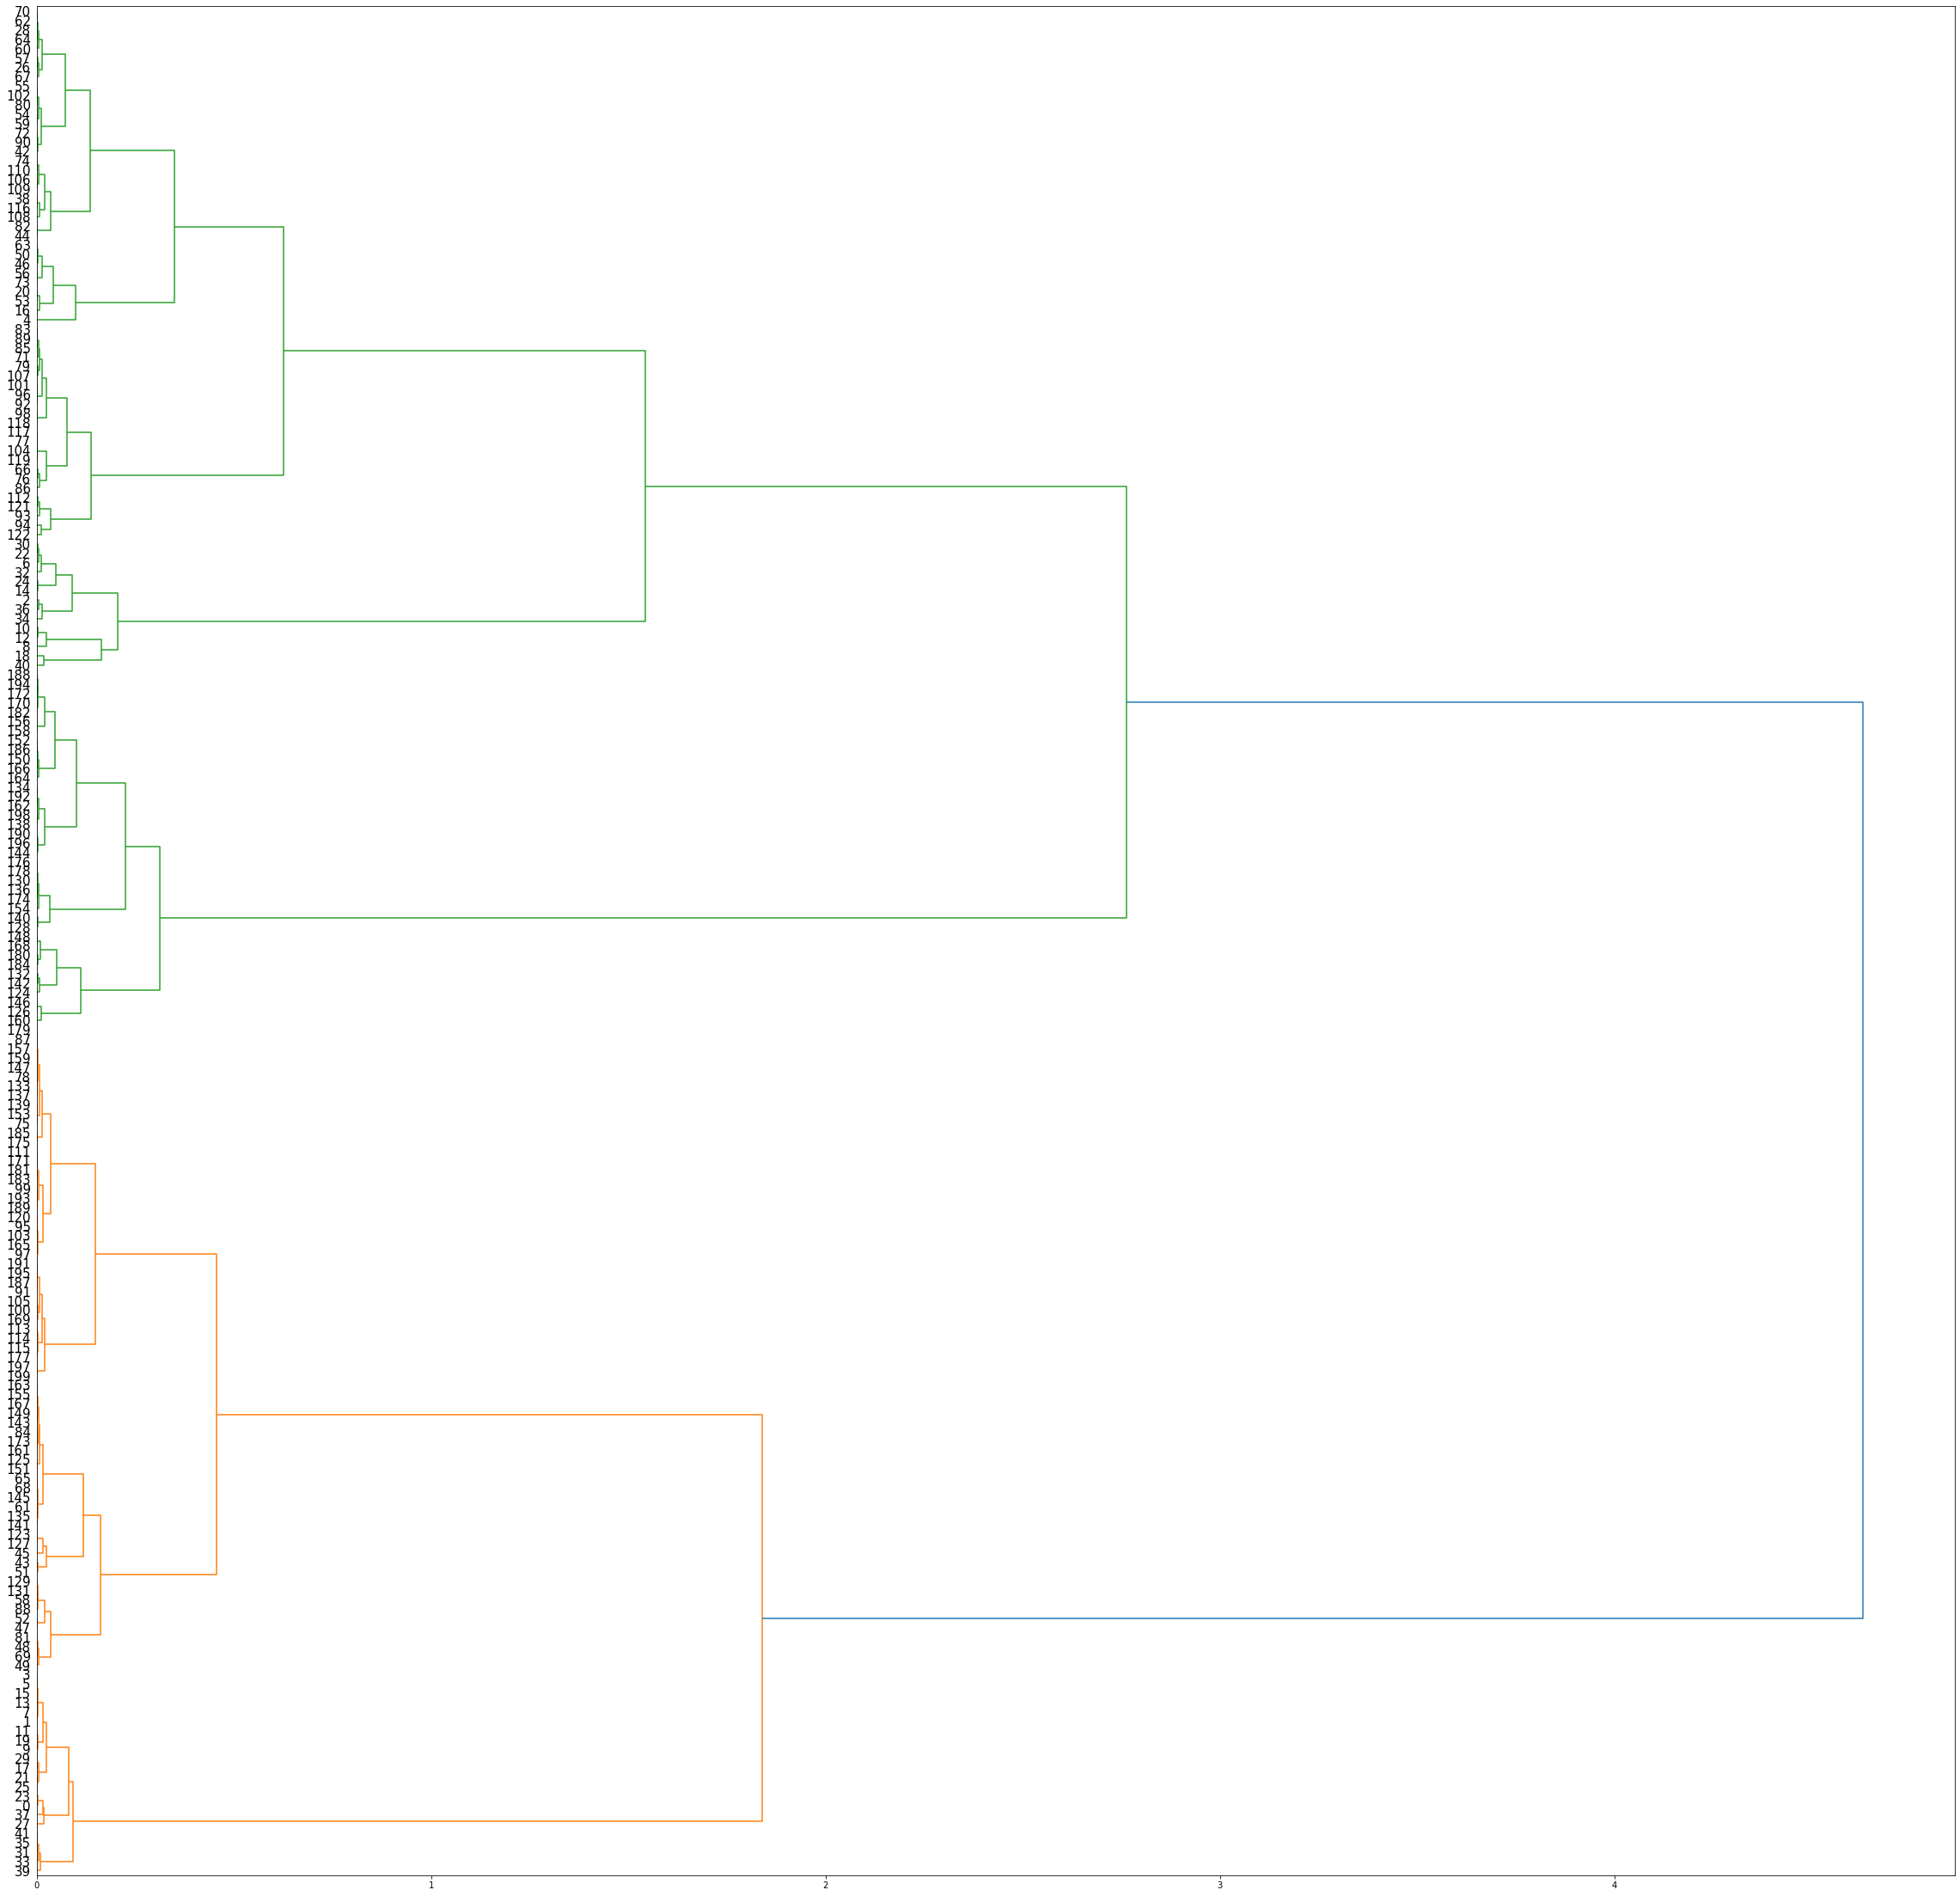

In [ ]:
fig=plt.figure(figsize=(40,40))
dendrogram(
    Z=dict_linkage["correlation_ward"] ,
    count_sort=True,
    orientation="right",
    leaf_font_size=15
)
plt.show()